**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [56]:
df = pd.read_csv(r'../data/temperatureTS.csv',squeeze=True, header = None, index_col=0)
df

0
2015-02-02 14:19:00    23.7000
2015-02-02 14:20:00    23.7180
2015-02-02 14:21:00    23.7300
2015-02-02 14:22:00    23.7225
2015-02-02 14:23:00    23.7540
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Name: 1, Length: 22741, dtype: float64

In [57]:
df = df['2015-02-03 00:00:00':'2015-02-17 23:59:00']
print(len(df))
print(60*24*15) #copre sei giorni minuto per minuto (8640 record)

21600
21600


In [58]:
df

0
2015-02-03 00:00:00    20.600000
2015-02-03 00:01:00    20.600000
2015-02-03 00:02:00    20.600000
2015-02-03 00:03:00    20.633333
2015-02-03 00:04:00    20.600000
                         ...    
2015-02-17 23:55:00    20.890000
2015-02-17 23:56:00    20.890000
2015-02-17 23:57:00    20.890000
2015-02-17 23:58:00    20.890000
2015-02-17 23:59:00    20.890000
Name: 1, Length: 21600, dtype: float64

In [59]:
ts = df.values
ts

array([20.6 , 20.6 , 20.6 , ..., 20.89, 20.89, 20.89])

In [60]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [61]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [84]:
# SAX transform
n_paa_segments = 720
#scelgo un numero che divide 8640 e divisibile per 6 (6 giorni)
n_sax_symbols = 10 #
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

In [85]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.6448536269514729: 0,
 -1.0364333894937898: 1,
 -0.6744897501960817: 2,
 -0.38532046640756773: 3,
 -0.12566134685507402: 4,
 0.12566134685507416: 5,
 0.38532046640756773: 6,
 0.6744897501960817: 7,
 1.0364333894937898: 8,
 1.6448536269514722: 9}

In [86]:
X_seq = list(ts_sax.ravel())

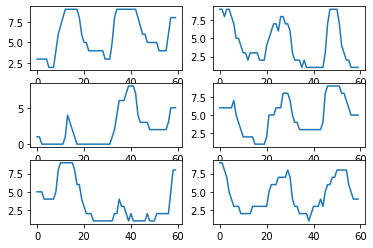

In [52]:
l = n_paa_segments // 6
tr = []

for i in range(6):
 
    plt.subplot(i+321)
    plt.plot(X_seq[i*l:i*l + l])
    #plt.show()
    tr.append(X_seq[i*l:i*l+l])
    #print(X_seq[i*l:i*l+l])
    #print("\n\n")
    
plt.show()
#ho diviso in sei giorni, ogni giorno è una transizione 


In [14]:
df = pd.read_csv(r'../data/datatraining.txt')
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [15]:
df = df[df['date'] > '2015-02-04 23:59:59']
df = df[df['date'] < '2015-02-10 00:00:00']

In [16]:
len(df)

7200

In [17]:
ts = df['HumidityRatio'].values

In [18]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

# Sequential Pattern Mining

In [87]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [88]:
X_seq = list(ts_sax.ravel())

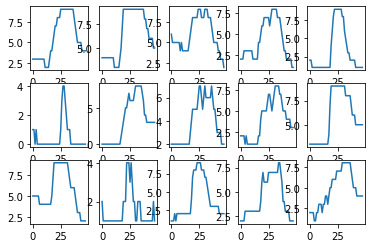

In [89]:
l = n_paa_segments // 15
tr = []

for i in range(0,15):
 
    plt.subplot(3,5,i+1)
    plt.plot(X_seq[i*l:i*l + l])
    #plt.show()
    tr.append(X_seq[i*l:i*l+l])
    #print(X_seq[i*l:i*l+l])
    #print("\n\n")
    
plt.show()
#ho diviso in sei giorni, ogni giorno è una transizione 


In [90]:
ps = PrefixSpan(tr)

In [91]:
 ps.topk(3, closed=True)

[(15, [3, 3]), (15, [4]), (14, [4, 4])]

In [97]:
ps.frequent(10, closed = True)

[(15, [3, 3]),
 (12, [3, 3, 3]),
 (11, [3, 3, 2]),
 (10, [3, 4]),
 (13, [2]),
 (10, [2, 2, 2, 2]),
 (10, [2, 3]),
 (10, [2, 4, 4]),
 (15, [4]),
 (14, [4, 4]),
 (10, [4, 4, 4]),
 (13, [4, 4, 3]),
 (11, [4, 4, 3, 3]),
 (12, [4, 5]),
 (10, [4, 5, 5]),
 (10, [4, 5, 4]),
 (13, [4, 6]),
 (12, [4, 6, 6]),
 (10, [4, 6, 6, 5]),
 (10, [4, 6, 6, 4]),
 (11, [4, 6, 5]),
 (11, [4, 6, 4]),
 (12, [4, 7, 7, 6]),
 (10, [4, 7, 7, 6, 5]),
 (10, [4, 7, 7, 6, 4]),
 (10, [4, 7, 8, 8, 7, 6]),
 (11, [4, 7, 8, 7, 6]),
 (11, [4, 8, 8, 6]),
 (12, [4, 8, 6]),
 (10, [4, 8, 6, 5]),
 (10, [4, 8, 6, 4]),
 (10, [6, 6, 6])]

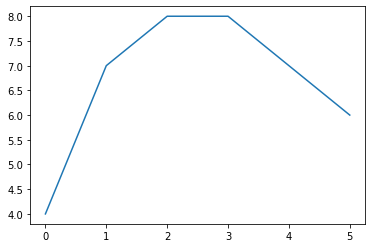

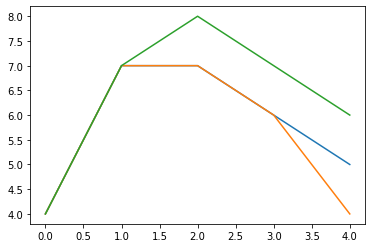

In [101]:

for j in range (10, 4, -1):       
    for i in ps.frequent(10, closed = True):
        if len(i[1]) == j:
            plt.plot(i[1])
    plt.show()


In [347]:
ps.topk(5, closed = True)

[(5, [4, 4, 4, 4, 4, 4]),
 (5, [6]),
 (5, [6, 7, 7, 7]),
 (4, [4, 4, 4, 5, 5, 5, 4]),
 (4, [4, 4, 4, 5, 6, 6])]

### transiction of mroe element

In [105]:
ts = df.values

In [106]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [122]:
# SAX transform
n_paa_segments = 1440
#scelgo un numero che divide 8640 e divisibile per 6 (6 giorni)
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

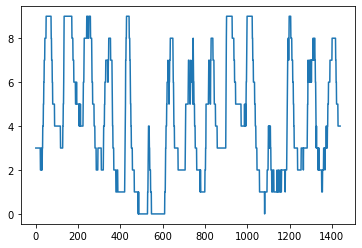

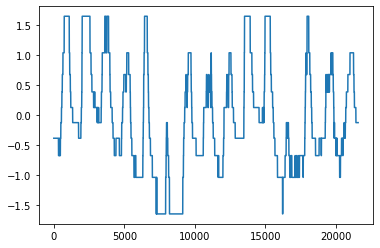

In [123]:
plt.plot(ts_sax.ravel())
plt.show()
plt.plot(sax_ts_inv.ravel())
plt.show()

In [124]:
X_seq = ts_sax.ravel()

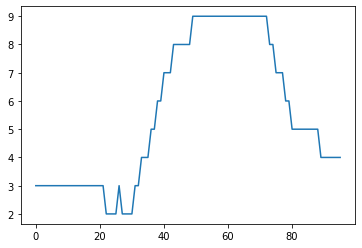

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 2 2 2 2 3 3 4 4 4 5
 5 6 6 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 8
 8 7 7 7 6 6 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4]





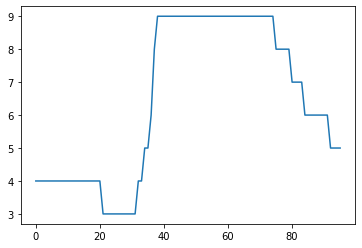

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 5 5 6
 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 8 8 8 8 8 7 7 7 7 6 6 6 6 6 6 6 6 5 5 5 5]





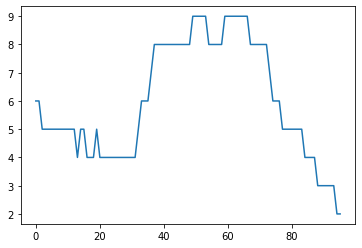

[6 6 5 5 5 5 5 5 5 5 5 5 5 4 5 5 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 5 6 6 6 7
 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 8 8 8 8 8 9 9 9 9 9 9 9 9 8 8 8 8 8 8 7
 6 6 6 5 5 5 5 5 5 5 4 4 4 4 3 3 3 3 3 3 2 2]





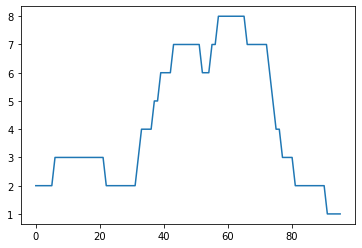

[2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 4 4 4 4
 5 5 6 6 6 6 7 7 7 7 7 7 7 7 7 6 6 6 7 7 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 6
 5 4 4 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1]





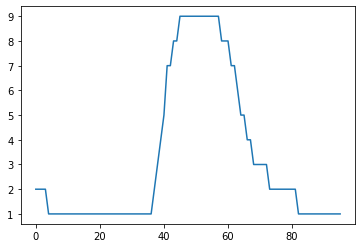

[2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 3 4 5 7 7 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 8 7 7 6 5 5 4 4 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]





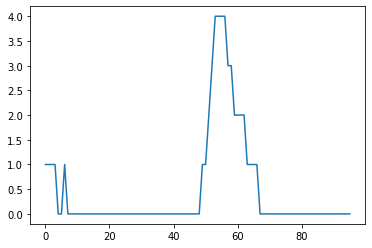

[1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 3 4 4 4 4 3 3 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]





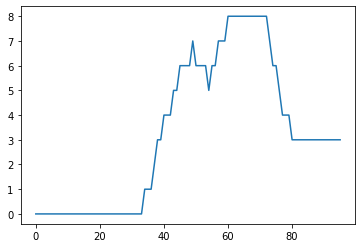

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 2 3 3 4 4 4 5 5 6 6 6 6 7 6 6 6 6 5 6 6 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 7
 6 6 5 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]





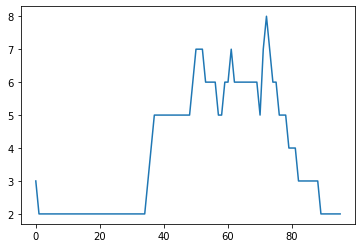

[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4
 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 7 6 6 6 6 5 5 6 6 7 6 6 6 6 6 6 6 6 5 7 8 7
 6 6 5 5 5 4 4 4 3 3 3 3 3 3 3 2 2 2 2 2 2 2]





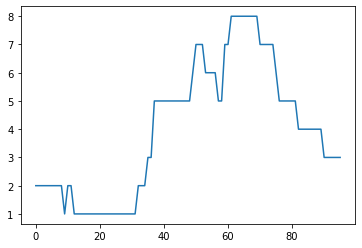

[2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3
 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 7 6 6 6 6 5 5 7 7 8 8 8 8 8 8 8 8 8 7 7 7 7
 7 6 5 5 5 5 5 5 4 4 4 4 4 4 4 4 3 3 3 3 3 3]





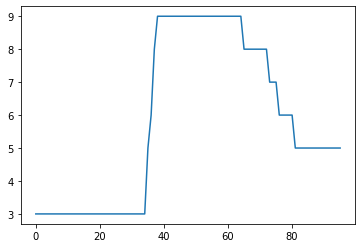

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 6
 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 8 8 8 8 8 8 7
 7 7 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]





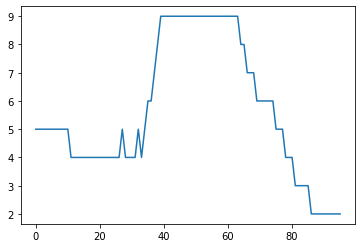

[5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 5 4 5 6 6
 7 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 7 7 7 6 6 6 6 6
 6 5 5 5 4 4 4 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2]





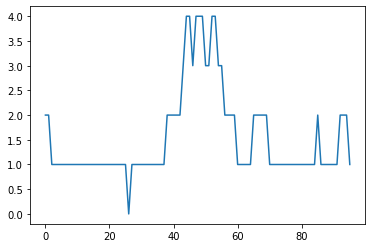

[2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 3 4 4 3 4 4 4 3 3 4 4 3 3 2 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1]





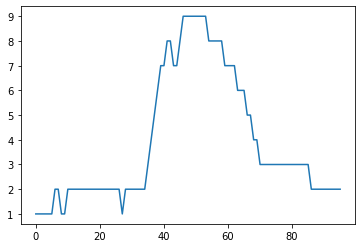

[1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 3 4
 5 6 7 7 8 8 7 7 8 9 9 9 9 9 9 9 9 8 8 8 8 8 7 7 7 7 6 6 6 5 5 4 4 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2]





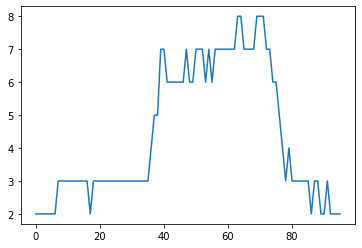

[2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 5 5 7 7 6 6 6 6 6 6 7 6 6 7 7 7 6 7 6 7 7 7 7 7 7 7 8 8 7 7 7 7 8 8 8 7 7
 6 6 5 4 3 4 3 3 3 3 3 3 2 3 3 2 2 3 2 2 2 2]





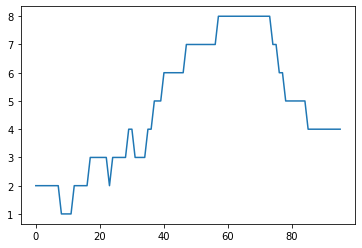

[2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 4 4 3 3 3 3 4 4
 5 5 5 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 7 7 6 6 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4]





In [125]:
l = n_paa_segments // 15
tr = []
for i in range(15):
    plt.plot(X_seq[i*l:i*l + l])
    plt.show()
    tr.append(X_seq[i*l:i*l+l])
    print(X_seq[i*l:i*l+l])
    print("\n\n")
    
#ho diviso in sei giorni, ogni giorno è una transizione 


In [116]:
for i in tr: print(i)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 2 2 2 2 3 3 4 4 4 5
 5 6 6 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 8
 8 7 7 7 6 6 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 5 5 6 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 8 8 8 7 7 7 7 6 6 6 6 6
 6 6 6 5 5 5 5 6 6 5 5 5 5 5 5 5 5 5 5 5 4 5 5 4 4 4 5 4 4 4 4 4 4 4 4 4 4
 4 4 5 6 6 6 7 8 8 8 8 8 8 8 8 8 8 8]
[8 9 9 9 9 9 8 8 8 8 8 9 9 9 9 9 9 9 9 8 8 8 8 8 8 7 6 6 6 5 5 5 5 5 5 5 4
 4 4 4 3 3 3 3 3 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 3 4 4 4 4 5 5 6 6 6 6 7 7 7 7 7 7 7 7 7 6 6 6 7 7 8 8 8 8 8 8
 8 8 8 7 7 7 7 7 7 7 6 5 4 4 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 4 5
 7 7 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 8 7 7 6 5 5 4 4 3 3 3 3 3 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 0 0 1 0 0 0 0 0

In [162]:
db = []
l = len(tr[0]) // 10
for t in tr:
    li = []
    for i in range(10):
        x = tuple(set(t[i*l:i*l+l]))
        if len(x) > 1 : li.append(x)
    db.append(li)



In [163]:
for i in db:print(i)

[(2, 3), (2, 3, 4), (8, 5, 6, 7), (8, 9), (5, 6, 7, 8, 9), (4, 5)]
[(3, 4), (3, 4, 5), (8, 9, 6), (8, 9, 7), (6, 7)]
[(5, 6), (4, 5), (4, 5), (4, 5, 6), (8, 7), (8, 9), (8, 9), (8, 9), (8, 5, 6, 7), (3, 4, 5)]
[(2, 3), (2, 3), (2, 3, 4), (4, 5, 6, 7), (6, 7), (8, 6, 7), (8, 7), (3, 4, 5, 6, 7)]
[(1, 2), (1, 2, 3, 4, 5, 7, 8), (8, 9, 7), (3, 4, 5, 6), (2, 3), (1, 2)]
[(0, 1), (0, 1, 2, 3, 4), (2, 3, 4), (0, 1)]
[(0, 1), (1, 2, 3, 4, 5), (6, 7), (8, 5, 6, 7), (3, 4, 5, 6, 7, 8)]
[(2, 3), (2, 3), (4, 5), (5, 6, 7), (5, 6, 7), (5, 6, 7), (4, 5, 6, 7, 8), (2, 3, 4)]
[(1, 2), (1, 2, 3), (3, 5), (5, 6, 7), (8, 5, 6, 7), (8, 7), (5, 6, 7), (4, 5)]
[(3, 5), (8, 9, 6), (8, 9), (8, 6, 7)]
[(4, 5), (4, 5, 6), (8, 9, 6, 7), (8, 9, 6, 7), (4, 5, 6), (2, 3)]
[(1, 2), (0, 1), (1, 2, 3, 4), (3, 4), (1, 2, 3), (1, 2), (1, 2)]
[(1, 2), (1, 2), (1, 2, 3), (4, 5, 6, 7, 8), (8, 9), (8, 7), (3, 4, 5, 6), (2, 3)]
[(2, 3), (2, 3), (4, 5, 6, 7), (6, 7), (6, 7), (8, 7), (3, 4, 5, 6, 7), (2, 3)]
[(1, 2), (1, 2, 3

In [164]:
p = PrefixSpan(db)

In [165]:
p.frequent(3, closed=True)

[(8, [(2, 3)]),
 (3, [(2, 3), (2, 3, 4)]),
 (3, [(2, 3), (4, 5)]),
 (3, [(2, 3), (2, 3)]),
 (3, [(2, 3), (6, 7), (8, 7)]),
 (4, [(2, 3, 4)]),
 (5, [(8, 5, 6, 7)]),
 (3, [(8, 5, 6, 7), (4, 5)]),
 (4, [(8, 9)]),
 (6, [(4, 5)]),
 (3, [(3, 4)]),
 (5, [(6, 7)]),
 (3, [(4, 5, 6)]),
 (6, [(8, 7)]),
 (5, [(1, 2)]),
 (3, [(1, 2), (2, 3)]),
 (3, [(1, 2), (1, 2)]),
 (4, [(1, 2), (1, 2, 3)]),
 (3, [(1, 2), (1, 2, 3), (8, 7)]),
 (3, [(0, 1)])]

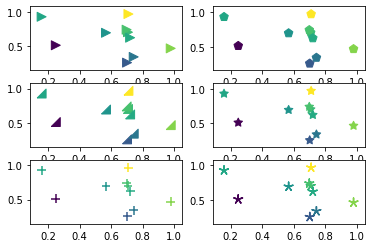

In [330]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()